In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-top-1000/IMDB top 1000.csv


In [5]:
data = pd.read_csv("/kaggle/input/imdb-top-1000/IMDB top 1000.csv")

In [6]:
data.head(5)

,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info
0,0,1. The Shawshank Redemption (1994),R,142 min,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...","Votes: 2,295,987 | Gross: $28.34M"
1,1,2. The Godfather (1972),R,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,"Votes: 1,584,782 | Gross: $134.97M"
2,2,3. The Dark Knight (2008),PG-13,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,"Votes: 2,260,649 | Gross: $534.86M"
3,3,4. The Godfather: Part II (1974),R,202 min,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,"Votes: 1,107,253 | Gross: $57.30M"
4,4,5. The Lord of the Rings: The Return of the Ki...,PG-13,201 min,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...","Votes: 1,614,369 | Gross: $377.85M"


In [8]:
X = np.array(data.Description)

In [11]:
data = data[['Title','Genre','Description']]
data.head()

,Title,Genre,Description
0,1. The Shawshank Redemption (1994),Drama,Two imprisoned men bond over a number of years...
1,2. The Godfather (1972),"Crime, Drama",The aging patriarch of an organized crime dyna...
2,3. The Dark Knight (2008),"Action, Crime, Drama",When the menace known as the Joker wreaks havo...
3,4. The Godfather: Part II (1974),"Crime, Drama",The early life and career of Vito Corleone in ...
4,5. The Lord of the Rings: The Return of the Ki...,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...


In [13]:
data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [15]:
pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=4d7cf0c4b9189f534d82b1d00828c0aeef4b80c0144bb917c9e3b1bd80fee2c0
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
Note: you may need to restart the kernel to use updated packages.


In [16]:
from sentence_transformers import SentenceTransformer

In [17]:
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
encodings = model.encode(text_data, show_progress_bar = True)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [22]:
encodings.shape

(1000, 768)

In [23]:
encodings[0]

array([-8.23074877e-02, -4.54634488e-01,  1.36787903e+00, -7.79557943e-01,
        1.74770743e-01, -6.04249716e-01,  2.31129527e-01, -6.06563926e-01,
        1.09872315e-02, -9.85894620e-01,  3.78730893e-01,  7.89121449e-01,
        3.22994083e-01,  9.57041860e-01,  6.51598454e-01,  2.42444098e-01,
        8.82436693e-01, -2.58791476e-01, -4.99463260e-01, -7.55478740e-01,
       -8.05452287e-01,  2.12197453e-02, -3.77831101e-01,  4.59459007e-01,
       -4.91995811e-01, -3.22080463e-01, -6.57998443e-01, -3.43747772e-02,
        2.22953409e-01,  6.49863064e-01,  8.71831357e-01,  5.68593204e-01,
       -9.37393486e-01, -8.20354298e-02,  2.93200947e-02, -3.92818265e-02,
        8.06126177e-01, -2.16178566e-01,  4.75953877e-01, -9.96587038e-01,
        1.40538990e+00,  3.34973820e-02,  3.87334585e-01,  1.10280168e+00,
       -6.28198028e-01, -3.19696933e-01, -1.56784207e-02, -1.11312382e-02,
       -7.72056639e-01, -2.27539927e-01, -4.76394236e-01,  1.19797163e-01,
        3.72285880e-02, -

In [24]:
text_data[0]

'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [28]:
embed_data = encodings
X = (embed_data)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,-2.802510,4.888666,-1.806468,1.878104,-0.997956
1,0.015650,3.755139,-3.542518,-0.089561,-4.088602
2,5.705875,-1.629297,0.544209,1.242804,1.377229
3,0.860129,4.290306,1.606837,-1.356889,-5.366359
4,5.467836,4.539944,2.133161,0.639263,2.633945


In [30]:
X = encodings

In [31]:
X.shape

(1000, 768)

In [32]:
type(X)

numpy.ndarray

In [41]:
similarities = cosine_similarity(X)

In [43]:
similarities[105]

array([0.4224179 , 0.59894156, 0.58440137, 0.56857145, 0.612004  ,
       0.54895556, 0.73612547, 0.42279604, 0.5577526 , 0.4849781 ,
       0.5772994 , 0.5621146 , 0.6446685 , 0.48791373, 0.47882092,
       0.6256715 , 0.44591174, 0.69080603, 0.6371368 , 0.43803033,
       0.4917053 , 0.54662   , 0.53851193, 0.74111295, 0.5869642 ,
       0.7194966 , 0.64214605, 0.69838667, 0.6108909 , 0.6647298 ,
       0.6339002 , 0.51546335, 0.58167183, 0.4696263 , 0.6257318 ,
       0.5345482 , 0.55972624, 0.6492438 , 0.60727626, 0.59435856,
       0.6250879 , 0.5717013 , 0.53809583, 0.64602697, 0.4515756 ,
       0.5919719 , 0.7002722 , 0.5591606 , 0.63181776, 0.58437777,
       0.5002638 , 0.4448722 , 0.3701425 , 0.6317731 , 0.6958464 ,
       0.24389198, 0.55793303, 0.5679679 , 0.6694584 , 0.59339815,
       0.5934795 , 0.68681407, 0.61322343, 0.58275163, 0.5545667 ,
       0.549146  , 0.55600363, 0.6295148 , 0.5664619 , 0.6436144 ,
       0.6884711 , 0.63369936, 0.6861625 , 0.7709891 , 0.54382

In [44]:
max(similarities[103])

0.9999995

In [45]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))

In [50]:
cos_sim_data

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.564105,0.350035,0.421647,0.408423,0.515788,0.353916,0.463879,0.387551,0.317381,...,0.421928,0.301461,0.331763,0.486533,0.533196,0.412390,0.478577,0.372154,0.339340,0.483325
1,0.564105,1.000000,0.511704,0.780594,0.491911,0.595211,0.617438,0.517384,0.674573,0.521223,...,0.583490,0.456675,0.569079,0.289950,0.608927,0.544784,0.461094,0.586763,0.427184,0.597710
2,0.350035,0.511704,1.000000,0.558546,0.561352,0.590945,0.544381,0.485291,0.676872,0.625679,...,0.712146,0.634532,0.531307,0.248447,0.335009,0.414815,0.617806,0.522990,0.492617,0.532658
3,0.421647,0.780594,0.558546,1.000000,0.457717,0.692699,0.603844,0.406723,0.589853,0.588154,...,0.484741,0.447398,0.570555,0.251659,0.659393,0.405923,0.406296,0.585365,0.369785,0.523199
4,0.408423,0.491911,0.561352,0.457717,1.000000,0.508571,0.528326,0.492655,0.526749,0.440733,...,0.580776,0.545353,0.513291,0.308959,0.437694,0.318166,0.494438,0.451324,0.342164,0.610388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.412390,0.544784,0.414815,0.405923,0.318166,0.354048,0.470499,0.527540,0.488918,0.331300,...,0.484165,0.334262,0.623889,0.269732,0.426647,1.000000,0.419399,0.427741,0.619298,0.533591
996,0.478577,0.461094,0.617806,0.406296,0.494438,0.576658,0.454384,0.448673,0.572090,0.639822,...,0.461422,0.600044,0.492384,0.270693,0.380851,0.419399,1.000000,0.324223,0.584834,0.637115
997,0.372154,0.586763,0.522990,0.585365,0.451324,0.529323,0.504907,0.550382,0.558841,0.464792,...,0.512785,0.426824,0.485785,0.230286,0.451925,0.427741,0.324223,1.000000,0.416202,0.468318
998,0.339340,0.427184,0.492617,0.369785,0.342164,0.507325,0.463545,0.465703,0.482995,0.523059,...,0.527231,0.504152,0.455300,0.239403,0.344337,0.619298,0.584834,0.416202,1.000000,0.611729


In [51]:
cos_sim_data[103][103]

0.9999995

In [52]:
cos_sim_data[0][0]

0.9999999

In [72]:
cos_sim_data[2]

0      0.350035
1      0.511704
2      1.000000
3      0.558546
4      0.561352
         ...   
995    0.414815
996    0.617806
997    0.522990
998    0.492617
999    0.532658
Name: 2, Length: 1000, dtype: float32

In [73]:
cos_sim_data[2].sort_values(ascending = False).index[1]

32

In [77]:
data.iloc[2]

Title                                  3. The Dark Knight (2008)
Genre                                       Action, Crime, Drama
Description    When the menace known as the Joker wreaks havo...
Name: 2, dtype: object

In [76]:
data.iloc[32]

Title                                           33. Joker (2019)
Genre                                     Crime, Drama, Thriller
Description    In Gotham City, mentally troubled comedian Art...
Name: 32, dtype: object

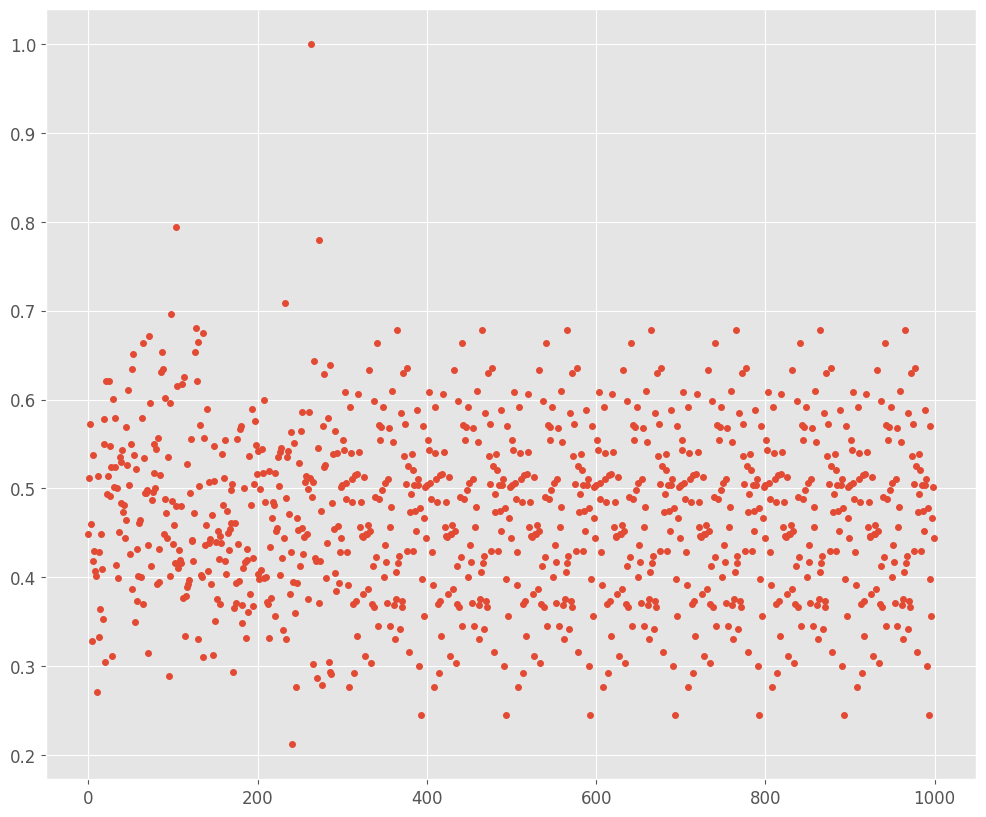

In [100]:
import random
index = random.randrange(0,X.shape[0])
sim = list(cos_sim_data[index].values)
indx = list(range(0,1000))
plt.plot(indx,sim,'.')

In [114]:
def get_recommndation(index):
    keys = cos_sim_data[index].sort_values(ascending = False).index[1:6]
    values = cos_sim_data[index].sort_values(ascending = False).values[1:6]
    return (keys,values)

In [138]:
index = 32
keys,values = get_recommndation(index)
print(index,keys,values)

32 Index([2, 159, 111, 96, 62], dtype='int64') [0.8290949  0.8206105  0.81485367 0.76892304 0.7591228 ]


In [139]:
for x in keys:
    print(data.iloc[x])

Title                                  3. The Dark Knight (2008)
Genre                                       Action, Crime, Drama
Description    When the menace known as the Joker wreaks havo...
Name: 2, dtype: object
Title            160. Lock, Stock and Two Smoking Barrels (1998)
Genre                                      Action, Comedy, Crime
Description    A botched card game in London triggers four fr...
Name: 159, dtype: object
Title                                    112. Taxi Driver (1976)
Genre                                               Crime, Drama
Description    A mentally unstable veteran works as a nightti...
Name: 111, dtype: object
Title                                          97. Snatch (2000)
Genre                                              Comedy, Crime
Description    Unscrupulous boxing promoters, violent bookmak...
Name: 96, dtype: object
Title                           63. The Dark Knight Rises (2012)
Genre                                          Action, Adv